Mean Squared Error: 9497.39957384082
R-squared: 0.4952274565298028


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


    Dataset     Accuracy
0  Training -5235.009259
1   Testing -5650.936563


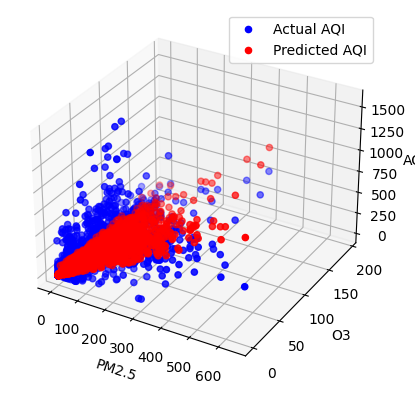

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
df = pd.read_csv('/content/city_day.csv')

# Assume your dataset has columns like 'PM2.5', 'Temperature', 'Humidity', etc.
# Replace these with your actual feature names
features = ['PM2.5', 'PM10', 'O3']

# Extract features and target variable (AQI)
df.fillna(0, inplace=True)
X = df[features]
y = df['AQI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model
svr_model = SVR(kernel='linear')  # You can choose different kernels based on your dataset

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


training_accuracy = svr_model.score(X_train, y_train)

# Testing Accuracy
testing_accuracy = svr_model.score(X_test, y_test)

# Create a structured table format
accuracy_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [training_accuracy, testing_accuracy]
})

# Display the table
print(accuracy_table)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['PM2.5'], X_test['O3'], y_test, label='Actual AQI', color='blue')
ax.scatter(X_test['PM2.5'], X_test['O3'], y_pred, label='Predicted AQI', color='red')
ax.set_xlabel('PM2.5')
ax.set_ylabel('O3')
ax.set_zlabel('AQI')
plt.legend()
plt.show()


